In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
presence_df = pd.read_csv("../results/file_presence.csv")
presence_df.head()

,id,name,created,location,subject_id,derived,data_description,acquisition,procedures,subject,instrument,processing,rig,session
0,be1441bf-8011-4f08-8ded-3b0e6ea61572,SmartSPIM_642480_2023-02-20_12-16-27,2023-03-01 04:58:10,s3://aind-open-data/SmartSPIM_642480_2023-02-2...,642480,0,1,1,0,1,1,0,0,0
1,36212ebd-c2b4-4b5e-a07d-138a732c5e70,SmartSPIM_656566_2023-02-23_14-01-43,2023-03-01 04:37:25,s3://aind-open-data/SmartSPIM_656566_2023-02-2...,656566,0,1,1,0,1,1,0,0,0
2,d19557c0-12b3-4d62-bca1-4db3ace32c81,SmartSPIM_656562_2023-02-23_10-21-02,2023-03-01 04:25:44,s3://aind-open-data/SmartSPIM_656562_2023-02-2...,656562,0,1,1,0,1,1,0,0,0
3,a3867a50-1498-43b5-9db5-81674884ab5d,SmartSPIM_AK016_2023-02-23_19-21-08,2023-02-28 22:07:23,s3://aind-open-data/SmartSPIM_AK016_2023-02-23...,AK016,0,1,1,0,0,0,0,0,0
4,638263e7-9f47-4ae1-b07a-1b0b19aea2dd,SmartSPIM_643634_2023-02-10_12-48-15,2023-02-28 04:39:06,s3://aind-open-data/SmartSPIM_643634_2023-02-1...,643634,0,1,1,0,0,1,0,0,0


In [13]:
stuff = presence_df['name']
stuff = [s.split('_')[0] for s in stuff]
print(set(stuff))

{'merfish', 'single-plane-ophys', 'pipeline', 'mesoSPIM', 'unstitched', 'FIP', 'han', 'ecephys', 'multiplane-ophys', 'smartspim', 'SmartSPIM', 'exaSPIM', 'Behavior Video Raw Data', 'ephys-compression-lossy-sim-results', 'dispim', 'HSFP', 'test-FIP-opto', 'Other', 'diSPIM'}


In [3]:
all_headings = ['data_description', 'acquisition', 'procedures', 'subject', 'instrument', 'processing', 'rig', 'session']


def count_present_files(df, file_headings):

    counts = pd.DataFrame(columns=['file', 'present', 'missing'])

    total_entries = len(df.index)

    for heading in file_headings:
        present = df[heading].sum()
        missing = total_entries - present
        counts.loc[len(counts)] = [heading, present, missing]

    return counts

counts = count_present_files(presence_df, all_headings)

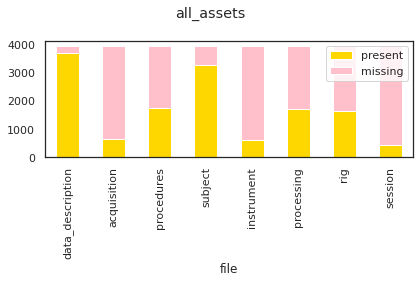

In [4]:
#set seaborn plotting aesthetics
%matplotlib inline

def stacked_presence_graph(df, plot_name):

    sns.set(style='white')

    #create stacked bar chart
    ax = df.set_index('file').plot(kind='bar', stacked=True, color=['gold', 'pink'])


    ax.figure.suptitle(plot_name)

    plt.tight_layout()

    ax.figure.savefig(f'../results/{plot_name}.pdf')

    
stacked_presence_graph(counts, 'all_assets')

In [5]:
raw_spim_headings = ['data_description', 'subject', 'procedures', 'instrument', 'acquisition']

derived_spim_headings = ['data_description', 'subject', 'procedures', 'instrument', 'acquisition', 'processing']

raw_phys_behavior_headings = ['data_description', 'subject', 'procedures', 'rig', 'session']

derived_phys_behavior_headings = ['data_description', 'subject', 'procedures', 'rig', 'session', 'processing']

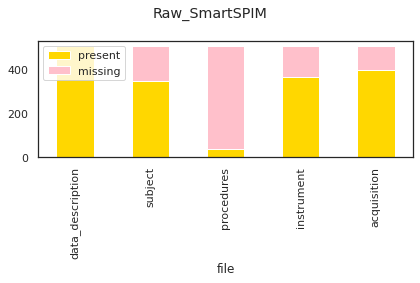

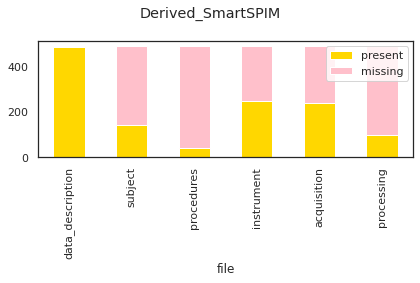

In [6]:
smartspim = presence_df[presence_df['name'].str.contains('SmartSPIM')]
smartspim_raw = smartspim[smartspim['derived'] == 0]
smartspim_derived = smartspim[smartspim['derived'] == 1]

smartspim_raw_counts = count_present_files(smartspim_raw, raw_spim_headings)
smartspim_derived_counts = count_present_files(smartspim_derived, derived_spim_headings)

stacked_presence_graph(smartspim_raw_counts, 'Raw_SmartSPIM')
stacked_presence_graph(smartspim_derived_counts, 'Derived_SmartSPIM')

In [11]:
def build_presence_graph(df, fig_title, name_includes, is_derived, headings):
    subset = df[df['name'].str.contains(name_includes)]
    subset = subset[subset['derived'] == is_derived]

    counts = count_present_files(subset, headings)

    stacked_presence_graph(counts, fig_title)

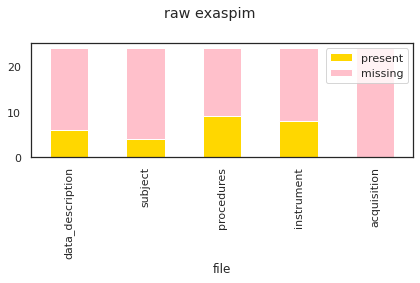

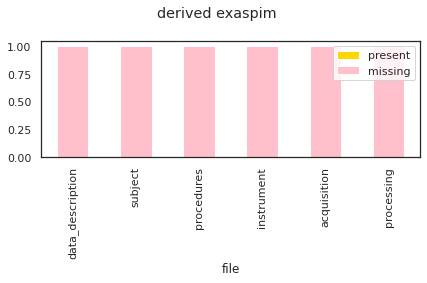

In [14]:
build_presence_graph(presence_df, "raw exaspim", 'exaSPIM', 0, raw_spim_headings)
build_presence_graph(presence_df, "derived exaspim", 'exaSPIM', 1, derived_spim_headings)

In [ ]:
for element in stuff:
    for derived in [0,1]:
        
        if derived:
            data_level = 'derived'
            if 'spim' in element:
                headings = derived_spim_headings
            else:
                headings = derived_phys_behavior_headings
            
        else:
            data_level = 'raw'
            if 'spim' in element:
                headings = raw_spim_headings
            else:
                headings = raw_phys_behavior_headings
            
        build_presence_graph(presence_df, f'{data_level}_{element}', element, derived, headings)

        

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)
